In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
print("Loading the data...")
hf = h5py.File('D:/Jupyter Notebook/Crack_Road_Classification/dataset/aaa/bbb.hdf5', 'r') #Replace the three dots with the directory you saved the dataset in
X = np.array(hf.get('X_concrete'))
y = np.array(hf.get("y_concrete"))
hf.close()
print("Data successfully loaded!")

print("Scaling the data...!")
X = X / 255
print("Data successfully scaled!")

Loading the data...
Data successfully loaded!
Scaling the data...!
Data successfully scaled!


In [5]:
X.shape

(8504, 128, 128, 1)

In [6]:
# 7:3 비율로 trainset, testset split
X_test, X = X[:2500], X[2500:]
y_test, y = y[:2500], y[2500:]

In [7]:
#model training part
model = Sequential()

img_size = 128
channels = 1

model.add(Conv2D(16, (3, 3), activation = "relu", input_shape = (img_size, img_size, channels)))
model.add(Conv2D(16, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(.3))

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(.3))

model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(Conv2D(64, (3,3 ), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(.3))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

print("Compiling the model...")
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
print("Model successfully compiled!!")

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 10)  # 조기종료 콜백함수

print("Fitting the model...")
hist = model.fit(X, y, batch_size = 20, epochs = 1000, validation_split = .2, callbacks = [early_stopping])
print("Model successfully fitted!!")

Compiling the model...
Model successfully compiled!!
Fitting the model...
Train on 4803 samples, validate on 1201 samples
Epoch 1/1000
4803/4803 [==============================] - 8s 2ms/sample - loss: 0.4572 - accuracy: 0.8049 - val_loss: 0.4362 - val_accuracy: 0.8201
Epoch 2/1000
4803/4803 [==============================] - 3s 639us/sample - loss: 0.3576 - accuracy: 0.8724 - val_loss: 0.3590 - val_accuracy: 0.8526
Epoch 3/1000
4803/4803 [==============================] - 3s 642us/sample - loss: 0.3257 - accuracy: 0.8869 - val_loss: 0.3076 - val_accuracy: 0.8909
Epoch 4/1000
4803/4803 [==============================] - 3s 637us/sample - loss: 0.2961 - accuracy: 0.8976 - val_loss: 0.2708 - val_accuracy: 0.9134
Epoch 5/1000
4803/4803 [==============================] - 3s 640us/sample - loss: 0.2740 - accuracy: 0.9103 - val_loss: 0.2731 - val_accuracy: 0.9034
Epoch 6/1000
4803/4803 [==============================] - 3s 641us/sample - loss: 0.2554 - accuracy: 0.9178 - val_loss: 0.3415 - v

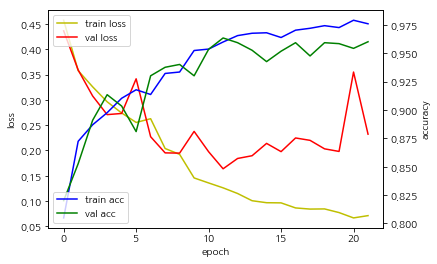

In [8]:
#training 중 train_loss, valid_loss, train_acc, valid_acc 그래프 표현
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()                   

## testset을 이용한 예측 결과

In [9]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

2500/2500 [==============================] - 1s 348us/sample - loss: 0.1319 - accuracy: 0.9664
loss : 0.13189333543404938
accuray : 0.9664


### 예측을 그래프로 표현

In [10]:
class_names = ["non-crack", "crack"]

In [11]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i, :, :, 0]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap="gray")

    predicted_label = np.argmax(predictions_array)
    if true_label == 0:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{}".format(class_names[true_label]), color=color)

In [12]:
yhat = model.predict_classes(X_test, verbose = 0)

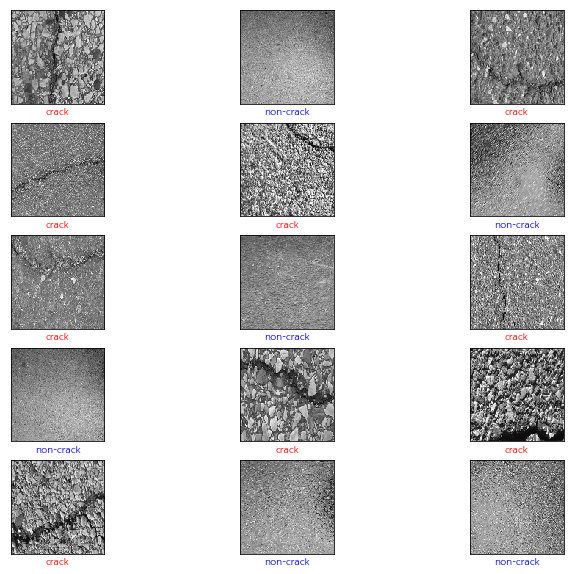

In [13]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, yhat, y_test, X_test)
plt.show()

In [ ]:
#save the train model
print("Saving the model...")
model.save("trainmodel.model")
print("Model successfully saved!!")